In [2]:
import pandas as pd

df = pd.read_csv("../data/startup_funding.csv")

df.drop(columns=['Remarks'], inplace= True)

df.set_index('Sr No', inplace=True)

df.rename(columns={
    'Date dd/mm/yyyy' : 'date',
    'Startup Name' : 'startup',
    'Industry Vertical' : 'vertical',
    'SubVertical' : 'subvertical',
    'City  Location' : 'city',
    'Investors Name' : 'investors',
    'InvestmentnType' : 'round',
    'Amount in USD' : 'amount'
}, inplace=True)

df['amount'] = df['amount'].fillna('0')

df['amount'] = df['amount'].str.replace(',', '')

df['amount'] = df['amount'].str.replace('undisclosed', '0')

df['amount'] = df['amount'].str.replace('Undisclosed', '0')

df['amount'] = df['amount'].str.replace('unknown', '0')

df = df[df['amount'].str.isdigit()]

df['amount'] = df['amount'].astype(float)

def dollar_to_inr(amount):
    return (amount * 82)/10000000

df['amount'] = df['amount'].apply(dollar_to_inr).round(2)

df['date'] = df['date'].str.replace('05/072018', '05/07/2018')

df['date'] = pd.to_datetime(df['date'], errors='coerce')

df = df.dropna(subset=['date', 'startup', 'vertical', 'city','investors', 'round', 'amount'])

df.head()

/var/folders/n4/669_syrx0qzf2gktz416h1d00000gn/T/ipykernel_79838/1646688996.py:41: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')


,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1640.00
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.00
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,150.54
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.60
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.76


In [3]:
# sorted(set(df['investors'].str.split(',').sum()))

In [4]:
investor = 'IDG Ventures'
df[df['investors'].str.contains(f'{investor}')].head(5)[['date', 'startup', 'vertical', 'city', 'round', 'amount']]

,date,startup,vertical,city,round,amount
Sr No,,,,,,
102,2019-04-13,Tripoto,Social Media,New Delhi,Series B,29.45
223,2018-07-30,Cure Fit,Consumer Internet,Bengaluru,Private Equity,984.00
259,2018-02-05,Bizongo,Consumer Internet,Mumbai,Private Equity,180.40
310,2018-04-26,POPxo,Technology,Delhi,Private Equity,45.10
439,2017-07-12,eShakti,Ecommerce,Chennai,Debt Funding,18.86


In [5]:
temp = df[df['investors'].str.contains(f'{investor}')].groupby('startup')['amount'].sum().sort_values(ascending=False)

In [6]:
temp.values

array([984.  , 492.  , 205.  , 205.  , 123.  , 123.  , 102.5 ,  82.  ,
        72.16,  70.52,  49.2 ,  49.2 ,  47.56,  43.46,  41.  ,  41.  ,
        32.8 ,  32.8 ,  32.8 ,  29.93,  29.45,  24.6 ,  22.14,  20.5 ,
        18.86,  16.4 ,  16.4 ,  16.4 ,  11.07,  11.07,   8.2 ,   8.2 ,
         8.2 ,   8.2 ,   6.15,   4.92,   0.  ,   0.  ,   0.  ,   0.  ])

In [7]:
df[df['investors'].str.contains(f'{investor}')].groupby('vertical')['amount'].sum().sort_values(ascending=False)
# .plot(kind='pie')

vertical
Consumer Internet                                          1709.29
eCommerce                                                   642.06
Technology                                                  339.48
Banking Analytics Platform                                  123.00
ECommerce                                                   102.50
Mobile Commerce for Farmers                                  32.80
Social Media                                                 29.45
Credit Management Services                                   20.50
Ecommerce                                                    18.86
Online content platform for women                            16.40
Hyperlocal Handyman Services                                 16.40
Online Furniture, Home Appliances Rental Platform            16.40
Hyperlocal healthcare product Delivery Service provider       8.20
CRM / Analytics platform                                      8.20
Bus Aggregation and rental mobile app                

In [8]:
df[df['investors'].str.contains(f'{investor}')].groupby('vertical')['amount'].sum().sort_values(ascending=False).sum()

3089.6899999999996

In [9]:
(3089 * 5)/100 

154.45

In [10]:
df['round']

Sr No
1       Private Equity Round
2                   Series C
3                   Series B
4               Pre-series A
5                 Seed Round
                ...         
2869          Private Equity
2870            Seed Funding
2871            Seed Funding
2872            Seed Funding
2873          Private Equity
Name: round, Length: 2822, dtype: object

In [11]:
df[df['investors'].str.contains(f'{investor}')].groupby('round')['amount'].sum().sort_values(ascending=False)

round
Private Equity    3022.11
Series B            29.45
Seed Funding        19.27
Debt Funding        18.86
Name: amount, dtype: float64

In [12]:
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1640.00
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.00
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,150.54
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.60
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.76


In [13]:
df['year'] = df['date'].dt.year

In [14]:
df[df['investors'].str.contains(f'{investor}')].groupby('year')['amount'].sum().sort_values(ascending=False)

year
2018    1209.50
2016    1044.68
2017     476.01
2015     330.05
2019      29.45
Name: amount, dtype: float64

<AxesSubplot: xlabel='year'>

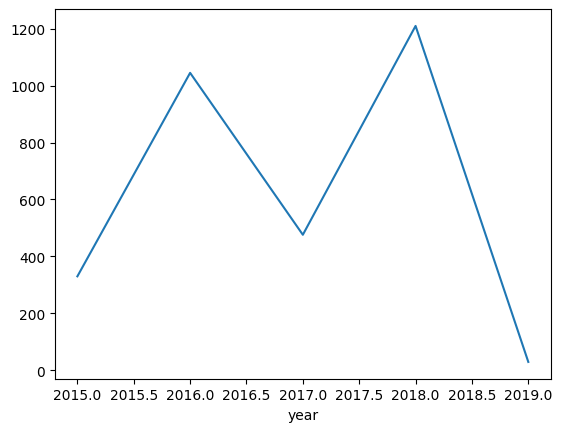

In [15]:
df[df['investors'].str.contains(f'{investor}')].groupby('year')['amount'].sum().plot()

In [18]:
round(df['amount'].sum(), 2)

294694.96

In [27]:
df.groupby('startup')['amount'].max().sort_values(ascending=False).index[0]

'Rapido Bike Taxi'

In [30]:
round(df.groupby('startup')['amount'].sum().mean(), 2)

128.18

In [32]:
df['month'] = df['date'].dt.month

In [57]:
temp_df = df.groupby(['year', 'month'])['amount'].sum().reset_index()
temp_df['year'].astype(str) + " - " + temp_df['month'].astype(str)

0      2015 - 1
1      2015 - 2
2      2015 - 3
3      2015 - 4
4      2015 - 5
        ...    
58    2019 - 12
59     2020 - 1
60     2020 - 2
61     2020 - 9
62    2020 - 10
Length: 63, dtype: object

In [52]:
temp_df

,year,month,amount
0,2015,1,5242.67
1,2015,2,1557.68
2,2015,3,1899.08
3,2015,4,4483.72
4,2015,5,1392.93
...,...,...,...
58,2019,12,3644.90
59,2020,1,139.80
60,2020,2,39.36
61,2020,9,1790.54
